In [1]:
#Pertama kita import dulu library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [2]:
#Lalu kita masukan dataset, kali ini saya meminjam dataset dari DQLab Academy
url = "https://academy.dqlab.id/dataset/credit_scoring_dqlab.xlsx"
df = pd.read_excel(url)
df.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [3]:
#Dari hasil pengamatan diatas, ada beberapa kolom yang tidak dibutuhkan, mari kita buang
df = df.drop(['kode_kontrak', 'rata_rata_overdue'], axis=1)
df

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,295,YA,48,5,4
1,271,YA,36,5,4
2,159,TIDAK,12,0,1
3,210,YA,12,3,3
4,165,TIDAK,36,0,2
...,...,...,...,...,...
895,112,YA,48,5,5
896,120,YA,48,2,3
897,166,TIDAK,24,2,1
898,196,TIDAK,48,0,2


In [4]:
#Ada colom yang bertipe "object", mari kita ubah menjadi bilangan agar terbaca oleh Algoritma
ubah_kpr = {'YA' : 1, 'TIDAK' : 0}
df = df.replace({"kpr_aktif" : ubah_kpr})
df.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,295,1,48,5,4
1,271,1,36,5,4
2,159,0,12,0,1
3,210,1,12,3,3
4,165,0,36,0,2


In [5]:
#Mari kita lihat lagi apakah data sudah benar-benar siap untuk dipakai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   pendapatan_setahun_juta  900 non-null    int64
 1   kpr_aktif                900 non-null    int64
 2   durasi_pinjaman_bulan    900 non-null    int64
 3   jumlah_tanggungan        900 non-null    int64
 4   risk_rating              900 non-null    int64
dtypes: int64(5)
memory usage: 35.3 KB


In [6]:
#Dari keterangan diatas, data sudah bersih dan siap dipakai, mari kita pisahkan antara Data Feature dan Data Target
x = df.drop('risk_rating', axis=1)
y = df['risk_rating']

In [7]:
#Setelah itu, kita bagi lagi antara data yang akan dilatih, dan data yang akan di test nantinya
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [8]:
#Masukkan model yang akan dipilih, kali ini saya menggunakan model Decision Tree
DTree = DecisionTreeClassifier()

In [9]:
#Melatih Model
DTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
#Memprediksi Data Test
hasil_prediksi = DTree.predict(x_test)

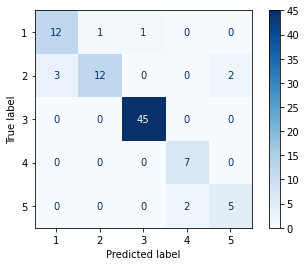

In [11]:
#Melihat perbandingan antara hasil prediksi data test dan data asli
plot_confusion_matrix(DTree, x_test, y_test, cmap=plt.cm.Blues)

In [12]:
#Melihat Score data Test
accuracy_score(y_test, hasil_prediksi)

0.9

## Terlihat bahwa Skor akurasi prediksi kita adalah sebesar 90%